In [1]:
#Import pacakges
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import matplotlib.pyplot as plt

# Parse Webpage Data into CSV
***

In [2]:
#Parse webpage data into a csv
r = requests.get("http://flavorsofcacao.com/database_w_REF.html")
soup = BeautifulSoup(r.content, "html.parser")

with open('dark_chocolate_bar_ratings.csv', 'w', newline='', encoding='utf-8') as f_output:
    csv_output = csv.writer(f_output)
    csv_output.writerow([th.get_text(strip=True) for th in soup.table.tr.find_all('th')])

    for tr in soup.table.find_all("tr")[1:]:
        csv_output.writerow([td.get_text(strip=True) for td in tr.find_all('td')])

# Initial Observations of Data
***

In [3]:
#Load data into data frame
df = pd.read_csv('dark_chocolate_bar_ratings.csv')
df.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
3,797,A. Morin,France,2012,Peru,Peru,63%,"4- B,S,C,L","fruity, melon, roasty",3.75
4,797,A. Morin,France,2012,Bolivia,Bolivia,70%,"4- B,S,C,L","vegetal, nutty",3.50


## Overall Dataset

In [4]:
#List of columns in dataset
df.columns

Index(['REF', 'Company (Manufacturer)', 'Company Location', 'Review Date',
       'Country of Bean Origin', 'Specific Bean Origin or Bar Name',
       'Cocoa Percent', 'Ingredients', 'Most Memorable Characteristics',
       'Rating'],
      dtype='object')

In [5]:
#Determine amount of observations and columns
df.shape

(2362, 10)

There are 2362 observations and 10 columns.

In [6]:
#Determine data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2362 non-null   int64  
 1   Company (Manufacturer)            2362 non-null   object 
 2   Company Location                  2362 non-null   object 
 3   Review Date                       2362 non-null   int64  
 4   Country of Bean Origin            2362 non-null   object 
 5   Specific Bean Origin or Bar Name  2362 non-null   object 
 6   Cocoa Percent                     2362 non-null   object 
 7   Ingredients                       2274 non-null   object 
 8   Most Memorable Characteristics    2362 non-null   object 
 9   Rating                            2362 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 184.7+ KB


* Three types of datatypes are present in the dataset: integer, object, and float.
* The only column with missing values is 'Ingredients'. The column is missing 88 values. 

In [7]:
#Summary of statistics
df.describe()

,REF,Review Date,Rating
count,2362.000000,2362.000000,2362.000000
mean,1343.279848,2013.894581,3.187384
std,709.468334,3.667615,0.450292
min,5.000000,2006.000000,1.000000
25%,754.000000,2011.000000,3.000000
50%,1377.000000,2014.000000,3.250000
75%,1948.000000,2017.000000,3.500000
max,2542.000000,2021.000000,4.000000


* No discernible outliers present in 'Ratings'.
* Most values in 'Rating' falls between 3.00 and 4.00.

In [8]:
#Detemine if duplicate rows in data present
sum(df.duplicated())

0

In [9]:
#Unqiue values for each varaibles
for col in df[['REF', 'Company (Manufacturer)', 'Company Location', 'Review Date',
       'Country of Bean Origin', 'Specific Bean Origin or Bar Name',
       'Cocoa Percent', 'Ingredients', 'Most Memorable Characteristics',
       'Rating']]:
    print('Number of unique values in ' + str(col) +': ' + str(df[col].nunique()))

Number of unique values in REF: 587
Number of unique values in Company (Manufacturer): 552
Number of unique values in Company Location: 67
Number of unique values in Review Date: 16
Number of unique values in Country of Bean Origin: 61
Number of unique values in Specific Bean Origin or Bar Name: 1475
Number of unique values in Cocoa Percent: 46
Number of unique values in Ingredients: 21
Number of unique values in Most Memorable Characteristics: 2320
Number of unique values in Rating: 13


## Dependent Variable

In [10]:
#Determine unique values in 'Rating'
unique_rating = df['Rating'].unique().tolist()
sorted(unique_rating)

[1.0, 1.5, 1.75, 2.0, 2.25, 2.5, 2.6, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0]

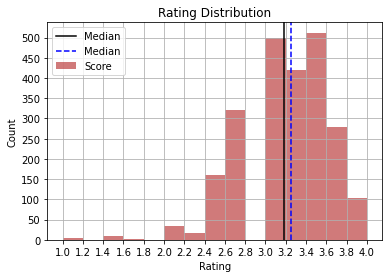

In [11]:
#Examin distribution of 'Rating'
rating = df.Rating

rating.hist(alpha=0.6, bins=15, color='firebrick',label = 'Score')
plt.title('Rating Distribution')
plt.locator_params(axis="x", nbins=20)
plt.locator_params(axis="y", nbins=20)
plt.axvline(rating.mean(), color='k', label='Median')
plt.axvline(rating.median(), color='blue',linestyle='dashed', label='Median')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend();

The distribution by rating scales is skewed left, which shows that most chocolate bars are rated more highly than poorly. Also, the distribution shows that a majority of the chocolate bars are rated roughly between 3.00 and 4.00.

## Independent Variables

In [12]:
#Determine unique values in 'REF'
unique_ref = df['REF'].unique().tolist()
sorted(unique_ref)[:20]

[5,
 15,
 24,
 32,
 40,
 48,
 56,
 63,
 75,
 81,
 87,
 93,
 99,
 105,
 111,
 117,
 123,
 129,
 135,
 141]

In [13]:
#Determine unique values in 'Company (Manufacturer)'
unique_company = df['Company (Manufacturer)'].unique().tolist()
sorted(unique_company)[:20]

['5150',
 'A. Morin',
 'AMMA',
 'Acalli',
 'Adi aka Fijiana (Easy In Ltd)',
 'Aelan',
 'Aequare (Gianduja)',
 'Ah Cacao',
 "Akesson's (Pralus)",
 'Alain Ducasse',
 'Alexandre',
 'Altus aka Cao Artisan',
 'Amano',
 'Amatller (Simon Coll)',
 'Amazing Cacao',
 'Amazona',
 'Ambrosia',
 'Amedei',
 'Anahata',
 'Animas']

In [14]:
#Determine unique values in 'Company Location'
unique_company_location = df['Company Location'].unique().tolist()
sorted(unique_company_location)[:20]

['Amsterdam',
 'Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Bolivia',
 'Brazil',
 'Canada',
 'Chile',
 'Colombia',
 'Costa Rica',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Fiji',
 'Finland',
 'France',
 'Germany']

In [15]:
#Determine unique values in 'Review Date'
unique_review_date = df['Review Date'].unique().tolist()
sorted(unique_review_date)[:20]

[2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [16]:
#Determine unique values in 'Country of Bean Origin'
unique_country = df['Country of Bean Origin'].unique().tolist()
sorted(unique_country)[:20]

['Australia',
 'Belize',
 'Blend',
 'Bolivia',
 'Brazil',
 'Burma',
 'Cameroon',
 'Colombia',
 'Congo',
 'Costa Rica',
 'Cuba',
 'DR Congo',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Fiji',
 'Gabon',
 'Ghana',
 'Grenada',
 'Guatemala']

In [17]:
#Determine unique values in 'Specific Bean Origin or Bar Name'
unique_specific = df['Specific Bean Origin or Bar Name'].unique().tolist()
sorted(unique_specific)[:20]

['"Peace of Wild Things"',
 '"heirloom", Arriba Nacional',
 '100 percent',
 '2009 Hapa Nibby, Dominican Rep., Bali',
 'A case of the Xerces Blues, triple roast',
 'ABOCFA Coop',
 'APROCAFA, Acandi',
 'Abinao, West Africa',
 'Absolu',
 'Abstract S. w/ Jamaica nibs,batch abs60323.0',
 'Acarigua, w/ nibs',
 'Acopagro',
 'Acul du Nard',
 'Acul-du-Nord, 2015',
 'Africa',
 'Africa meets Latina',
 'Africa, West Africa',
 'AgroCriso Plantation',
 'Agua Fria; Sucre region, H. La Trinidad',
 'Agua Grande']

In [18]:
#Determine unique values in 'Cocoa Percent'
unique_percent = df['Cocoa Percent'].unique().tolist()
sorted(unique_percent)[:20]

['100%',
 '42%',
 '46%',
 '50%',
 '53%',
 '55%',
 '56%',
 '57%',
 '58%',
 '60%',
 '60.5%',
 '61%',
 '62%',
 '63%',
 '64%',
 '65%',
 '66%',
 '67%',
 '68%',
 '69%']

In [19]:
#Determine unique values in 'Ingredients'
unique_ingredients = df['Ingredients'].dropna().unique().tolist()
sorted(unique_ingredients)[:20]

['1- B',
 '2- B,C',
 '2- B,S',
 '2- B,S*',
 '3- B,S*,C',
 '3- B,S*,Sa',
 '3- B,S,C',
 '3- B,S,L',
 '3- B,S,V',
 '4- B,S*,C,L',
 '4- B,S*,C,Sa',
 '4- B,S*,C,V',
 '4- B,S*,V,L',
 '4- B,S,C,L',
 '4- B,S,C,Sa',
 '4- B,S,C,V',
 '4- B,S,V,L',
 '5- B,S,C,L,Sa',
 '5- B,S,C,V,L',
 '5-B,S,C,V,Sa']

In [20]:
#Determine unique values in 'Most Memorable Characteristics'
unique_memorable = df['Most Memorable Characteristics'].unique().tolist()
sorted(unique_memorable)[:20]

['Easter candy, burnt',
 'Fruity, Roasty',
 'XL nibs, sour, cardboard',
 'accesible, simple cocoa note',
 'accessible, sweet, sandy',
 'acidic, astringent, spicy',
 'acidic, astringent, unpleasant',
 'acidic, bitter, dry',
 'acidic, cocoa, dried fruit',
 'acidic, mildly burnt, metallic',
 'acidic, pomegrant, brownie',
 'acidic, sour, cocoa',
 'acidic, sweet, cucumber',
 'acidic, undefined, brownie, off',
 'alluring aroma, powdery,nutty',
 'aluminum, mild coffee, roasty',
 'anise, spicy, earthy',
 'appealing smoke, woody',
 'apple, mild cherry',
 'ashey, woody, bright red']

# Findings of Initial Observations
***
The focus of this analysis is to determine which variables of a dark chocolate bar result in a high-quality rated dark chocolate bar.

### Overal Understanding of Dataset
* There are 2362 observations (rows) and 10 variables (columns) in the dataset.
* Three types of datatypes are present in the dataset; integer, object, and float.
* The only column with missing values is 'Ingredients'. The column is missing 88 out of 2362 values.
* There are no duplicate rows in the dataset.
* All the columns have a range of 13 to 1475 unique values (none of which can be used as a unique identifier)
* For this analysis, the independent variable and the focus of the analysis is 'Rating' 
* The remaining variables show a significant need for cleaning and transformation.


### Understanding of Each Variable in Dataset
#### *'REF', 'Company (Manufacturer)', 'Company Location', and 'Review Date'*
The variables 'REF', 'Company (Manufacturer)', 'Company Location', and 'Review Date' are not necessary for this analysis since those variables do not relate directly to the characteristic of the chocolate bar itself. Rather, these variables relate to either the company producing the chocolate bar or the review itself. 
* The variables 'Company (Manufacturer)', 'Company Location' are not necessary because the analysis is not trying to discover which companies produce high-quality chocolate bars. The focus is entirely on the individual chocolate bar ratings, regardless of which company produced them.
* The variables 'REF' and 'Review Date' relate to when the review of the chocolate bar was made and have no relation to its quality rating. Therefore, these variables will be removed.

#### *'Rating'*
'Rating' was the dependent variable of this analysis since the value was the quality level of each dark chocolate bar.
* No discernible outliers present in 'Rating'.
* Most values in 'Rating' falls between 3.00 and 4.00.

#### *'Country of Bean Origin'*
This column seems clean. However, to confirm the accuracy of the data I will compare the values in this dataset against a repository of all the countries (and possibly territories) in the world. This will ensure that my data is accurate and fix any errors present in the data.  

#### *'Specific Bean Origin or Bar Name'*
The column 'Specific Bean Origin or Bar Name' has multiple values represented in one column. It seems to include the specific bean origin (maybe region or city), the chocolate bar's name, the batch number, and more. However, it is not certain that breaking this column into multiple columns based on the different kinds of values will produce enough data to better the analysis. To determine if this will help the analysis, I will compare the possible values to a list of locations and similar repositories. After removing values by country, city, batch #, etc. if there is still over half the data undiscernible I will drop the column. If not, then I will place the data into the new columns.

#### *'Cocoa Percent'*
The column 'Cocoa Percent' is better represented as a float datatype to allow more extensive calculations for the analysis.

#### *'Ingredients'*
'Ingredients' represents two values; the number of ingredients and what type of ingredients were used. This column will need to be separated into two columns. The first column for the number of ingredients. The second and the other for type of ingredients, to better utilize the information in this column.

#### *'Most Memorable Characteristics'*
'Most Memorable Characteristics' shows the most memorable characteristics of a dark chocolate bar in the form of a string (object in data frames) datatype. There seems to be double spacing, inconsistent use of characteristics naming, spelling errors, and more that needs to be cleaned. This will establish consistency for characteristics and produce better insights.